<h1 align="center"> Walmart Store's Sales Forcasting </h1>

![](https://walton.uark.edu/insights/images/greg-smith-post.png)


In this project, we will implement many types of machine learning model and hyperparameter tuning to forcast the sales of Walmart store. For this I have used the walmart dataset from `Kaggle` compettion - https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting.

## Installing and Importing required Libraries

In [1]:
!pip install opendatasets --upgrade --quiet
print("Installetion Done")

Installetion Done


In [2]:
# Importing required libraries
import opendatasets as od
import os
from zipfile import ZipFile
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # ignoring annoying warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline



# For better visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Download, Extract and Load Datasets

In [3]:
# downloading the dataset
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data')

Skipping, found downloaded files in ".\walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [4]:
# Extracting data from the Zip files

with ZipFile('./walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='data')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='data') 
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='data') 
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='data') 

In [5]:
# Loading datasets
train_ds = pd.read_csv('./data/train.csv')
test_ds = pd.read_csv('./data/test.csv')
features_ds = pd.read_csv('./data/features.csv')
stores_ds = pd.read_csv("./walmart-recruiting-store-sales-forecasting/stores.csv")

In [6]:
train_ds.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
test_ds.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
features_ds.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
stores_ds.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Merging Datasets
Here we will marge the datasets on `left` mode.

In [10]:
train_merged = train_ds.merge(stores_ds, how ="left").merge(features_ds, how="left")
test_merged = test_ds.merge(stores_ds, how ="left").merge(features_ds, how="left")

In [11]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [12]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


### Extract informations from Date column
Here we will create these three columns `Day` , `Month`, `Year` and  after extracting informations from the `Date` column

In [13]:
def split_date_column(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0 

In [14]:
split_date_column(train_merged)
split_date_column(test_merged)

In [15]:
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,5,9.0


## Exploratory Data Analysis (EDA)

Let's explore the `columns` and `datatypes` of each columns.

In [16]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [17]:
train_merged.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,15.673131,25.826762
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,8.753549,14.151887
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,8.000000,14.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,16.000000,26.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,23.000000,38.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,31.000000,52.000000


### Exploring Missing Values
Now see the number of missing values each column has.

In [18]:
missing_values = train_merged.isna().sum()
missing_values

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

Except `MarkDown1` to `MarkDown5` columns, all the columns have no missing values. As these columns are for only available for promotional program and that wasn't available before 2011, so these number of missing values are reasonable.

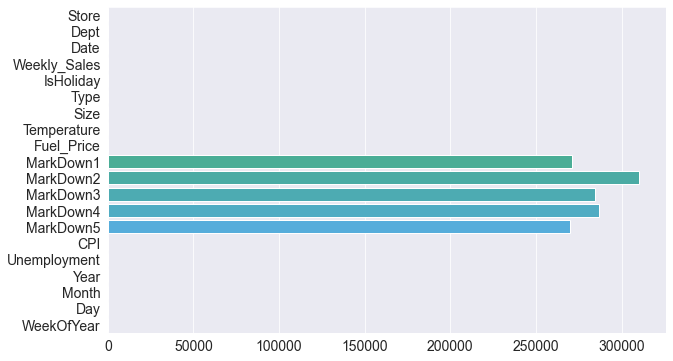

In [19]:
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.show()

Now, take some insights from the datasets

### Number of shops of different types

In [20]:
shops_no = train_merged["Type"].value_counts()
shops_no

A    215478
B    163495
C     42597
Name: Type, dtype: int64

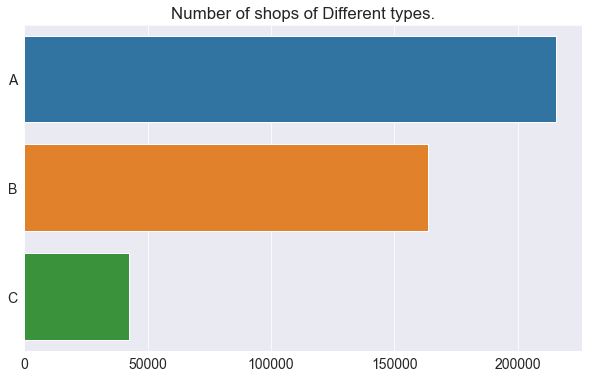

In [21]:
sns.barplot(x=shops_no.values, y=shops_no.index)
plt.title("Number of shops of Different types.")
plt.show()

So, there is more `type A` shops compared to `type B` and `type C`

In [22]:
train_merged.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,0.002997,0.001011,-0.000015,0.001031
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,0.003738,0.000904,-0.000678,0.000882
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,-0.010111,0.028409,-0.006187,0.027673
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,-0.056746,0.123376,0.045465,0.128184
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238,-0.004975,-0.001210,-0.000386,-0.001292
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,0.065814,0.235983,0.026832,0.236276
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.779633,-0.040876,0.028058,-0.031140
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.141332,-0.176188,-0.292096,-0.198076
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,-0.222109,-0.005310,0.064475,-0.000995
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,-0.319162,0.187871,0.137674,0.196307


<AxesSubplot:>

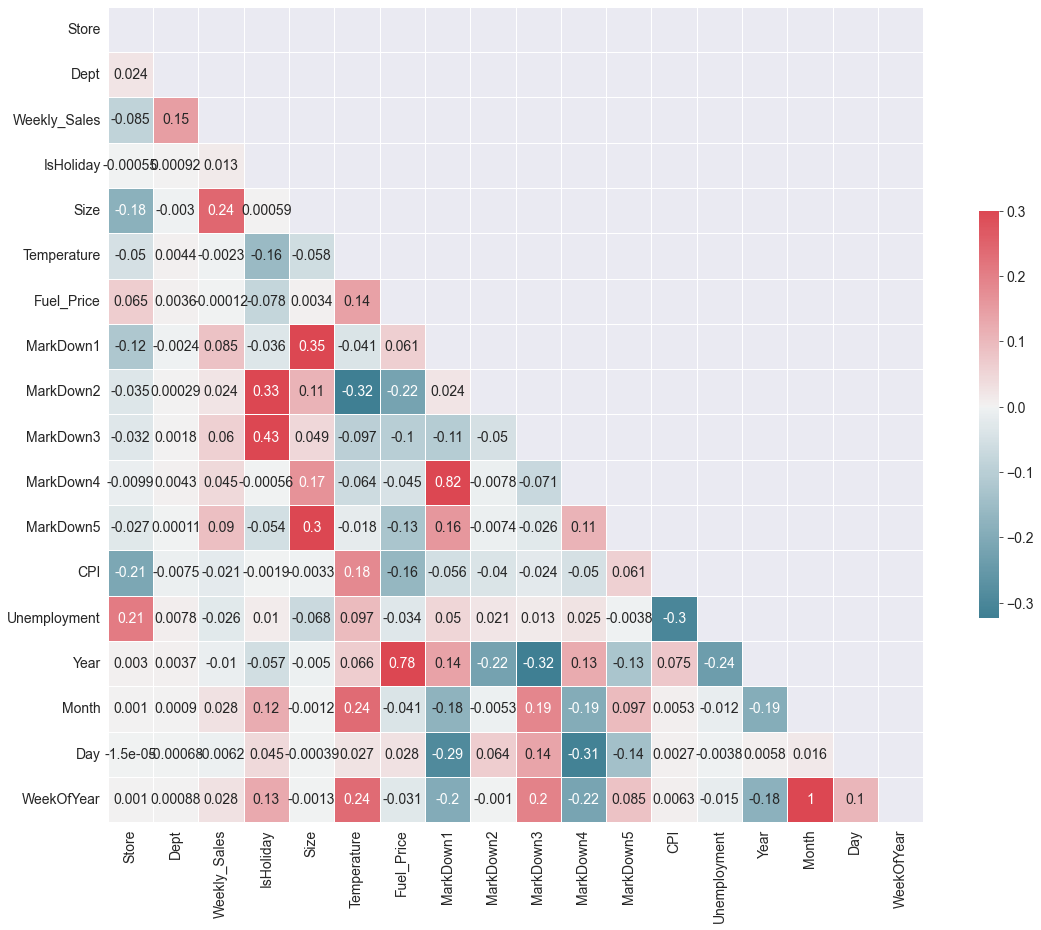

In [23]:
corr = train_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

**Insights:**
From the correaltion graph, we can see that some columns have small correlation with `weekly_sales`. So we can ignore them in the training process. These columns are - `Date`, `Temperature`, `Fuel_Price`, `Month`, `Day`, 

## Preparing datasets for model training.

In this section we will perform following steps to prepare datasets for the training -
 - Select inputs columns from the datasets which have significant correlation with `Weekly_sales`.
 - Identify inputs and target columns
 - Impute missing values of with appropiate values
 - Scale all the numeric columns to make them ready for the training.
 - Transform categorical or boolean columns into numeric column

### Importing requiered libraies

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [25]:
train_merged.shape

(421570, 20)

In [26]:
train_merged = train_merged[train_merged['Weekly_Sales'] > 0].copy()
train_merged.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,WeekOfYear
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,150181.000000,110904.000000,136651.000000,134518.000000,150929.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,136749.732787,60.090599,3.360890,7247.821269,3330.146158,1441.736203,3384.782267,4629.531870,171.212496,7.960000,2010.968454,6.449866,15.673903,25.828408
std,12.787236,30.508819,22729.492116,60993.084568,18.447857,0.458519,8293.028741,9460.395025,9631.968459,6295.136952,5960.171711,39.162445,1.863879,0.796898,3.243397,8.752818,14.152489
min,1.000000,1.000000,0.010000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2120.130000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,8.000000,14.000000
50%,22.000000,37.000000,7661.700000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000,2011.000000,6.000000,16.000000,26.000000
75%,33.000000,74.000000,20271.265000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.445487,8.567000,2012.000000,9.000000,23.000000,38.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,31.000000,52.000000


In [27]:
# Identifying Inputs and target columns
input_cols = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'WeekOfYear']
target_col = "Weekly_Sales"

# Tyoewise Columns
numeric_cols = ['Store', 'Dept', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'WeekOfYear']
cat_cols = ["Type"]
bool_cols = ["IsHoliday"]

# Creating dataframe with these columns
inputs_df = train_merged[input_cols].copy()
test_inputs = test_merged[input_cols].copy()
targets_df = train_merged[target_col].copy()

### Splitting datasets into training and validation set

In [28]:
X_train, X_val, y_train, y_val = train_test_split(inputs_df,targets_df, test_size=0.1, random_state=1)

### Imputing Missing values
Now `impute` the missing values of columns `MarkDown1-5` with `0`. As 0 means no markdown. This can be done by the help of `SimpleImputer` function from `sklearn.impute`

In [29]:
impute_cols = ['MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
imputer = SimpleImputer(strategy="constant").fit(inputs_df[impute_cols])
X_train[impute_cols] = imputer.transform(X_train[impute_cols])
X_val[impute_cols] = imputer.transform(X_val[impute_cols])
test_inputs[impute_cols] = imputer.transform(test_inputs[impute_cols])

In [30]:
X_train.head()

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,WeekOfYear
400175,43,17,False,C,41062,122.11,8.64,26.26,0.00,532.33,211.587991,9.653,2012,4.0
205143,21,79,False,B,140167,0.00,0.00,0.00,0.00,0.00,211.518721,8.163,2010,42.0
51207,6,19,False,A,202505,0.00,0.00,0.00,0.00,0.00,212.698244,7.092,2010,22.0
116305,12,85,False,B,112238,8404.29,2192.75,3.91,1479.91,5882.51,130.741379,12.187,2012,10.0
266200,27,93,False,A,204184,12507.63,2681.10,99.95,1433.43,3244.98,141.901526,8.253,2012,16.0


### Scale Numeric Values
Let's scale all the numeric columns in the range of `0 to 1`.

In [31]:
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### One hot Encoding for categorical Columns

In [32]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_val[encoded_cols] = encoder.transform(X_val[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

### Changing Boolean columns to 0 and 1

In [33]:
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_val[bool_cols] = X_val[bool_cols].astype(int)
test_inputs[bool_cols] = test_inputs[bool_cols].astype(int)

### Finalize train, validation and testing sets

In [34]:
X_train = X_train[numeric_cols+ bool_cols + encoded_cols]
X_val = X_val[numeric_cols + bool_cols + encoded_cols]
test_inputs = test_inputs[numeric_cols + bool_cols + encoded_cols]

# Training the model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Model-01: RandomForestRegressor

In [36]:
def random_forest_tuning(n_estimators, max_depth):
    history =[]
    count =0
    for estimator in n_estimators:
        for depth in max_depth:
            count+=1
            
            # generate model
            model = RandomForestRegressor(n_estimators=estimator, max_depth= depth).fit(X_train, y_train)
            
            # predict train, and validation
            preds_train = model.predict(X_train)
            preds_val = model.predict(X_val)
            
            # compute train and validation loss
            loss_train = mean_squared_error(preds_train, y_train, squared=False)
            loss_val = mean_squared_error(preds_val, y_val, squared=False)
            
            # saving info to an array of dictionary
            h = {"Count": count, "n_estimators": estimator, "max_depth":depth, "training_loss": loss_train, "validation_loss": loss_val}
            print(h)
            history.append(h)
    return history

In [37]:
%%time
history = []
n_estimators = [57,59]
max_depth = [27, 30]

history+=random_forest_tuning(n_estimators,  max_depth)

{'Count': 1, 'n_estimators': 57, 'max_depth': 27, 'training_loss': 1369.7606811806832, 'validation_loss': 3431.9168297367473}
{'Count': 2, 'n_estimators': 57, 'max_depth': 30, 'training_loss': 1335.7655687222316, 'validation_loss': 3413.041014037154}
{'Count': 3, 'n_estimators': 59, 'max_depth': 27, 'training_loss': 1329.4492381367381, 'validation_loss': 3410.3178822705304}
{'Count': 4, 'n_estimators': 59, 'max_depth': 30, 'training_loss': 1329.5153336268768, 'validation_loss': 3428.177976700489}
Wall time: 10min 48s


## Model-02: XGBRegressor

In [38]:
def XGBR_tuning(n_estimators, max_depth):
    history =[]
    count =0
    for estimator in n_estimators:
        for depth in max_depth:
            count+=1
            
            # generate model
            model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=estimator, 
                     learning_rate=0.2, max_depth=depth , subsample=0.9, 
                     colsample_bytree=0.7, seed =1301).fit(X_train, y_train)
            
            # predict train, and validation
            preds_train = model.predict(X_train)
            preds_val = model.predict(X_val)
            
            # compute train and validation loss
            loss_train = mean_squared_error(preds_train, y_train,squared=False )
            loss_val = mean_squared_error(preds_val, y_val, squared=False)
            
            # saving info to an array of dictionary
            h = {"Count": count, "n_estimators": estimator, "max_depth":depth, "training_loss": loss_train, "validation_loss": loss_val}
            print(h)
            history.append(h)
    return history

In [57]:
%%time
history = []
n_estimators = [1000,1200]
max_depth = [10]

history+=XGBR_tuning(n_estimators, max_depth)

{'Count': 1, 'n_estimators': 1000, 'max_depth': 10, 'training_loss': 1020.0981034754507, 'validation_loss': 2719.313882132732}
{'Count': 2, 'n_estimators': 1200, 'max_depth': 10, 'training_loss': 911.4254194516562, 'validation_loss': 2703.0797886297246}
Wall time: 10min 49s


## Final model
As `XGBRegressor` model works well on the validation datasets with the hyperparameters of `n_estimators = 1000` and `max_depth = 10`. So now it's time to finalize our model.

In [40]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators = 1200, 
                     learning_rate=0.2, max_depth= 10, subsample=0.9, 
                     colsample_bytree=0.7, seed =1301).fit(X_train, y_train)

# Prediction ov validation set
preds = model.predict(X_val)

# Calculate loss
loss = mean_squared_error(preds, y_val, squared=False)
loss

2719.313882132732

## Predict with a single input

In [56]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[impute_cols] = imputer.transform(input_df[impute_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[cat_cols])
    input_df[bool_cols] = input_df[bool_cols].astype(int)
    X_input = input_df[numeric_cols + encoded_cols + bool_cols]
    pred = model.predict(X_input)[0]
    return pred

new_input = {'Store':5000,
             'Dept':600, 
             'IsHoliday':True, 
             'Type': 'B', 
             'Size':200, 
             'MarkDown1': 0, 
             'MarkDown2': 0, 
             'MarkDown3': 500,
             'MarkDown4': 0, 
             'MarkDown5': 0, 
             'CPI':23 , 
             'Unemployment':0, 
             'Year':2014, 
             'WeekOfYear': 55}

pred = predict_input(new_input)
pred

754.8375

### Saving the model

In [44]:
import joblib

In [45]:
walmart_weekly_sales = {'model': model, 'imputer': imputer, 'scaler': scaler, 'encoder': encoder,
               'input_cols': input_cols, 'target_col': target_col, 'numeric_cols': numeric_cols,
               'cat_cols': cat_cols, 'encoded_cols': encoded_cols, "bool_cols":bool_cols}
joblib.dump(walmart_weekly_sales, 'walmart_weekly_sales.joblib')

['walmart_weekly_sales.joblib']

## Summary and References
 We covered the following topics in this project:

- Downloading a real-world dataset from Kaggle
- Exploratory data analysis and visualization
- Splitting a dataset into training, validation
- Filling/imputing missing values in numeric columns
- Scaling numeric features to a $(0,1)$ range
- Encoding categorical columns as one-hot vectors
- Training a RandomForest regression model using Scikit-learn
- Training a XGB regression model using Scikit-learn
- Doing hyperparameter tuning for the best hyperparameters
- Evaluating a model using a validation set
- Creating function for the prediction with single input
- Saving a model to disk and loading it back

References Notebooks -
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost
- https://www.kaggle.com/code/avelinocaio/walmart-store-sales-forecasting
